# Plotting some results from isotope sampling at M-17 ice cave

In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/ice-accummulation-M17


In [2]:
# first input some library imports
import pandas as pd
import matplotlib.pyplot as plt
import scripts.GNIP as gnip

In [3]:
pd.set_option('precision', 2)

In [4]:
# read the data from the isotope sampling at Migovec, into a pandas dataframe
cave = gnip.ReadCustom('data/isotopes/isotopes_migovec.csv')

In [5]:
# read the data from GNIP into a dataframe
regional = gnip.ReadArchive('data/isotopes/GNIP_archive_slovenia.csv')

Now that the different modules and their respective functions are loaded, we are ready to explore the data and plot the results in d2H/d18O space.

In [6]:
cave.head()

s.d. height  d18O  \
cave protocol transect samplename column height (cm)                      
M15  DRIP     -999.0   MIG-77D    -999.0                   -999.0 -9.06   
                       MIG-78D    -999.0                   -999.0 -8.89   
     FIRN      2.0     MIG-71      200.0                      5.0 -5.92   
                       MIG-72      220.0                      5.0 -5.51   
                       MIG-73      240.0                      5.0 -5.09   

                                                      s.d. d18O    d2H  \
cave protocol transect samplename column height (cm)                     
M15  DRIP     -999.0   MIG-77D    -999.0                   0.08 -58.00   
                       MIG-78D    -999.0                   0.06 -56.67   
     FIRN      2.0     MIG-71      200.0                   0.04 -36.43   
                       MIG-72      220.0                   0.08 -33.52   
                       MIG-73      240.0                   0.05 -30.48   

                                                      s.d. d2H  layer   \
cave protocol transect samplename column height (cm)                     
M15  DRIP     -999.0   MIG-77D    -999.0                  0.33  -999.0   
                       MIG-78D    -999.0                  0.28  -999.0   
     FIRN      2.0     MIG-71      200.0                  0.33     5.0   
                       MIG-72      220.0                  0.25     5.0   
                       MIG-73      240.0                  0.11     5.0   

                                                      layer type  d-excess  \
cave protocol transect samplename column height (cm)                         
M15  DRIP     -999.0   MIG-77D    -999.0                  -999.0     14.48   
                       MIG-78D    -999.0                  -999.0     14.45   
     FIRN      2.0     MIG-71      200.0                     0.0     10.93   
                       MIG-72      220.0                     0.0     10.56   
                       MIG-73      240.0                     0.0     10.24   

                                                      s.d. d-excess  
cave protocol transect samplename column height (cm)                 
M15  DRIP     -999.0   MIG-77D    -999.0                       0.34  
                       MIG-78D    -999.0                       0.29  
     FIRN      2.0     MIG-71      200.0                       0.33  
                       MIG-72      220.0                       0.26  
                       MIG-73      240.0                       0.12

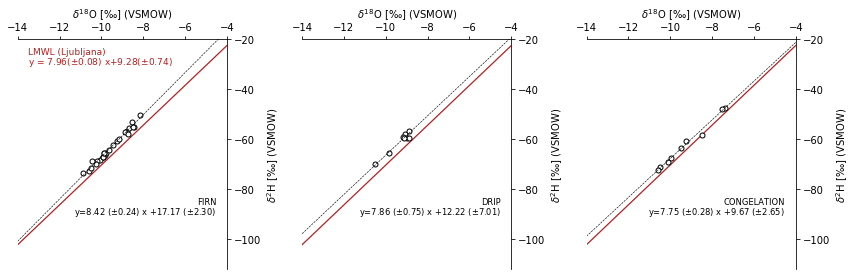

In [7]:
## set up the figure environment
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))

## perform some sub-sampling of M-17 isotope data to be plotted
# firn samples from M-17 cave
firn = cave.loc[('M17','FIRN')].copy()

# dripwater from M-17 and M-15
drip = cave.xs('DRIP', level=1, drop_level=False).copy()

# congelation ice (both from floor and speleothems)
congel = pd.concat((cave.loc[('M17','ICICLE'),:].query('d18O >-12'),
           cave.loc[('M17','MELTICE'),:].query('d18O >-12'))).copy()

labels = ("FIRN","DRIP","CONGELATION")

for dat,ax,l in zip((firn,drip,congel),(ax1,ax2,ax3), labels):
    
    # make arrays of the isotopic data
    xi,yi =dat['d18O'].to_numpy(),dat['d2H'].to_numpy()
    # compute the PWLSR locally to get the coefficients and plot them
    f,coeffs = gnip.PWLSR(regional,'LJUBLJANA')
    
    # call the custom plotting function on each dataset
    gnip.PlotLMWL(ax,regional,'LJUBLJANA',xi,yi,l,(-4.5,-90),**{'ha':'right'})


# plot the local meteoric waterline equation but only on the first subplot
ax1.text(-13.5,-26, 'LMWL (Ljubljana)', color = 'firebrick', fontsize = 9)
ax1.text(-13.5,-30,color = 'firebrick',fontsize = 9,
         s ="y = {:.2f}($\pm${:.2f}) x+{:.2f}($\pm${:.2f})"\
         .format(coeffs['slope'],
                 coeffs['$\\sigma_{a(w)}$'],
                 coeffs['intercept'],
                 coeffs['$\\sigma_{b(w)}$']))


plt.tight_layout()

plt.savefig("outputs/isotopes.pdf", dpi =300)
plt.show()